## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

#### learning dynamic programming by max splitting problem

In [1]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [2]:
from collections import defaultdict

In [3]:
price = defaultdict(int)  #生成一个长度和价格的对应关系的字典
for i,p in enumerate(original_price):
    price[i+1]=p
price[10]

30

Define the function for maxsplit problem

$$r_n=max(p_n,r_1+r_{n-1},r_2+r_{n-2},....,r_{n-1}+r_1)$$

In [4]:
def r1(n):
    return max([price[n]]+[r1(n-i)+r1(i) for i in range(1,n)])
r1(13)

40

In [5]:
called_time=defaultdict(int)   #建立字典观察每个函数被call的次数
def get_call_times_1(f):
    result=f()
    print('function:{} called once!'.format(f.__name__))
    called_time[f.__name__] +=1
    return result

In [6]:
def some_funcion_1(): print('I am function 1')

In [7]:
get_call_times_1(some_funcion_1)        #简单展示get_call_times(f)的作用

I am function 1
function:some_funcion_1 called once!


In [8]:
called_time

defaultdict(int, {'some_funcion_1': 1})

In [9]:
call_time_with_arg1 = defaultdict(int)

In [10]:
def r2(n):   #重新定义max revenue,加上临时观察calltime的功能
    fname=r2.__name__
    call_time_with_arg1[(fname,n)]+=1
    return max([price[n]]+[r2(n-i)+r2(i) for i in range(1,n)])
r2(8)

22

In [11]:
call_time_with_arg1      #观察每个长度被叫到的次数，被反复叫到

defaultdict(int,
            {('r2', 8): 1,
             ('r2', 7): 2,
             ('r2', 6): 6,
             ('r2', 5): 18,
             ('r2', 4): 54,
             ('r2', 3): 162,
             ('r2', 2): 486,
             ('r2', 1): 1458})

In [12]:
call_time_with_arg2=defaultdict(int)
def get_call_times_2(f):#在保留原有函数作用的前提下，增加一些新的功能(观察次数)
    """@param f is a function"""
    def wrap(n):
        #print('i can count')
        result=f(n)
        call_time_with_arg2[(f.__name__,n)]+=1
        return result
    return wrap

In [13]:
def add_ten(n):return n+10

In [14]:
add_ten=get_call_times_2(add_ten)

In [15]:
add_ten(10)

20

In [16]:
@get_call_times_2      #用装饰器进行简写
def add_twenty(n):
    return n+20

In [17]:
add_twenty(10)

30

给revenue函数加上装饰器，从而不需要在函数内部定义变量、字典来观察call time

In [18]:
@get_call_times_2
def r3(n):   #重新定义max revenue,加上临时观察calltime的功能
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    return max([price[n]]+[r3(n-i)+r3(i) for i in range(1,n)])
r3(8)

22

In [19]:
call_time_with_arg2

defaultdict(int,
            {('add_ten', 10): 1,
             ('add_twenty', 10): 1,
             ('r3', 1): 1458,
             ('r3', 2): 486,
             ('r3', 3): 162,
             ('r3', 4): 54,
             ('r3', 5): 18,
             ('r3', 6): 6,
             ('r3', 7): 2,
             ('r3', 8): 1})

In [20]:
help(r3)   #装饰器使函数失去了原有的命名的意义

Help on function wrap in module __main__:

wrap(n)



In [21]:
from functools import wraps

In [22]:
call_time_with_arg3=defaultdict(int)

In [23]:
def get_call_times_3(f):#在保留原有函数作用的前提下，增加一些新的功能(观察次数)
    """@param f is a function"""
    @wraps(f)             #加上这一句,保留原函数的命名意义
    def wrap(n):
        #print('i can count')
        result=f(n)
        call_time_with_arg3[(f.__name__,n)]+=1
        #print(call_time_with_arg3)
        return result
    return wrap

In [24]:
@get_call_times_3
def r4(n):  
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    return max([price[n]]+[r4(n-i)+r4(i) for i in range(1,n)])
r4(8)

22

In [25]:
help(r4)   #保留r4的内容

Help on function r4 in module __main__:

r4(n)
    Args: n is the iron length
    Return: the max revenue



In [26]:
def memo(f):
    already_computed={}
    @wraps(f)
    def _wrap(arg):
        result=None
        
        if arg in already_computed:
            result=already_computed[arg]
        else:
            result=f(arg)
            already_computed[arg]=result
        return result
    return _wrap

In [27]:
@memo
@get_call_times_3
def r5(n):   #把r用memo装饰一下  
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    return max([price[n]]+[r5(n-i)+r5(i) for i in range(1,n)])

In [28]:
r5(20)    #注意速度明显变快，运行r5之前记得重新运行一下call_time_with_arg3=defaultdict(int) 清空字典

60

In [29]:
call_time_with_arg3          #每个片段只被call一次

defaultdict(int,
            {('r4', 1): 1458,
             ('r4', 2): 486,
             ('r4', 3): 162,
             ('r4', 4): 54,
             ('r4', 5): 18,
             ('r4', 6): 6,
             ('r4', 7): 2,
             ('r4', 8): 1,
             ('r5', 1): 1,
             ('r5', 2): 1,
             ('r5', 3): 1,
             ('r5', 4): 1,
             ('r5', 5): 1,
             ('r5', 6): 1,
             ('r5', 7): 1,
             ('r5', 8): 1,
             ('r5', 9): 1,
             ('r5', 10): 1,
             ('r5', 11): 1,
             ('r5', 12): 1,
             ('r5', 13): 1,
             ('r5', 14): 1,
             ('r5', 15): 1,
             ('r5', 16): 1,
             ('r5', 17): 1,
             ('r5', 18): 1,
             ('r5', 19): 1,
             ('r5', 20): 1})

## Dynamic Programming （动态查表）
+ 1. Overlapping Subproblems------------------------------>都有一个重复的子问题，already_computed
+ 2. Overlapping computing saved in a table------------->通过r6(n)生成字典solution
+ 3. Parse solution----------------------------------------------->function parse_solution

In [30]:
solution = {}

In [31]:
#@get_call_times_3
@memo
def r6(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    max_price, max_split = max(
        [(price[n], 0)] + [(r6(i) + r6(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )

    solution[n] = (n - max_split, max_split)
    
    return max_price

In [32]:
def parse_solution(n):  #得到切分方式
    left_split,right_split=solution[n]
    if right_split==0:return [left_split]  #如果右边为0，说明只切割成1断，左边的数值就是最佳切割方式
    return(parse_solution(left_split)+parse_solution(right_split))

In [33]:
r6(111)

351

In [34]:
parse_solution(111)

[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1]

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

Done in assignment 2

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [35]:
from functools import lru_cache

In [65]:
solutionD={}    #注意每次计算不同单词间的距离，需要重新运行solutionD={}

In [66]:
@lru_cache(maxsize=2**10)      #把相对耗时的函数结果进行保存，避免传入相同的参数重复计算。同时,不用的缓存会被释放
def edit_distance(string1,string2):
    if len(string1)==0:return len(string2)
    if len(string2)==0:return len(string1)  #任一string为空,编辑距离为另一个string的Length
    
    tail_s1=string1[-1]  #原理是建立一个矩阵，通过矩阵记录计算好的距离
    tail_s2=string2[-1]
    
    candidates=[
        (edit_distance(string1[:-1],string2)+1,'DEL {}'.format(tail_s1)), #string1 delete tail
        (edit_distance(string1,string2[:-1])+1,'ADD {}'.format(tail_s2)), #string1 add tail of string2
    ]
    
    if tail_s1==tail_s2:
        both_forward=(edit_distance(string1[:-1],string2[:-1])+0,'')
    else:
        both_forward=(edit_distance(string1[:-1],string2[:-1])+1,'SUB {} => {}'.format(tail_s1,tail_s2))
 
    candidates.append(both_forward)
    
    min_distance,operation=min(candidates,key=lambda x:x[0])  #distance为Del+1,Add+1,Sub+0或1三种操作的最小值
    solutionD[(string1,string2)]=operation
    
    return min_distance

In [67]:
step=[]          #注意每次计算不同单词的变化路径，需要重新运行step=[]

In [68]:
def parse_solutionD(string1,string2):
    if (string1=='') and (string2==''):return []
    elif string1=='':
        step.append('{s1}->{s2}:ADD {l}'.format(s1='',s2=string2,l=string2[-1]))
    elif string2=='':
        step.append('{s1}->{s2}:DEL {l}'.format(s1=string1,s2='',l=string1[-1]))
    else:
        operation = solutionD[(string1,string2)]
        step.append('{s1}->{s2}:{op}'.format(s1=string1,s2=string2,op=operation))
        if operation.startswith('SUB') or operation =='':
            string1=string1[:-1]+string2[-1]
        elif operation.startswith('ADD'):
            string1=string1+string2[-1]
        elif operation.startswith('DEL'):
            string2=string2+string1[-1]
    parse_solutionD(string1[:-1],string2[:-1])
    return step 

In [55]:
edit_distance('ABCDE', 'ABCCEF')

2

In [56]:
solutionD

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCD', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F'}

In [57]:
parse_solutionD('ABCDE', 'ABCCEF')

['ABCDE->ABCCEF:ADD F',
 'ABCDE->ABCCE:',
 'ABCD->ABCC:SUB D => C',
 'ABC->ABC:',
 'AB->AB:',
 'A->A:']

In [69]:
edit_distance('INTENTION', 'EXECUTION')

5

In [70]:
parse_solutionD('INTENTION', 'EXECUTION')

['INTENTION->EXECUTION:',
 'INTENTIO->EXECUTIO:',
 'INTENTI->EXECUTI:',
 'INTENT->EXECUT:',
 'INTEN->EXECU:ADD U',
 'INTEN->EXEC:SUB N => C',
 'INTE->EXE:',
 'INT->EX:DEL T',
 'IN->EX:SUB N => X',
 'I->E:SUB I => E']

In [191]:
edit_distance('1010', '11100')

2

In [192]:
parse_solutionD('1010', '11100')

['1010->11100:ADD 0', '1010->1110:', '101->111:', '10->11:SUB 0 => 1', '1->1:']

In [191]:
edit_distance('1010', '11100')

2

In [192]:
parse_solutionD('1010', '11100')

['1010->11100:ADD 0', '1010->1110:', '101->111:', '10->11:SUB 0 => 1', '1->1:']

In [197]:
edit_distance('beijing', 'biejin')

3

In [198]:
parse_solutionD('beijing', 'biejin')

['beijing->biejin:DEL g',
 'beijin->biejin:',
 'beiji->bieji:',
 'beij->biej:',
 'bei->bie:DEL i',
 'be->bie:',
 'b->bi:ADD i',
 'b->b:']

In [203]:
edit_distance('ATCGGAA', 'ATCGGGA')

1

In [204]:
parse_solutionD('ATCGGAA', 'ATCGGGA')

['ATCGGAA->ATCGGGA:',
 'ATCGGA->ATCGGG:SUB A => G',
 'ATCGG->ATCGG:',
 'ATCG->ATCG:',
 'ATC->ATC:',
 'AT->AT:',
 'A->A:']

### 运行中的问题，每次计算不同的距离和演示变化步骤，需要先重新运行solutionD={} ，def edit_distance(),step=[],def parse_solutionD,如果只重新运行solutionD={},call edit_distance的时候solutionD会一直是空字典，不太理解为什么，call edit_distance不是应该在运行过程中把相应的内容放进字典吗？为什么一定要重新运行一下定义函数的过程才可以work?

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:使用梯度可以明确的朝loss function减小的方向变化

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:梯度是loss function的导数，下降指得是朝梯度负增长的方向更新参数


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:参数的变化方向更明确，下降速度更快

4. Using the simple words to describe: What's the machine leanring.¶

Ans:如何输入数据来有效的获取函数参数具体值得学科

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans:相对于brute force,动态规划能够大大减少计算重复，提高效率。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans:动态规划问题一般不具备一个可以抽象成函数的结果

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans:编辑距离，拆分价格最高问题，TSP问题

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans:语音识别，抄袭检查，拼写自动提示

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans:1.最优子结构性质：如果问题的最优解包含的子问题的解也是最优的，我们就称该问题具有最优子结构性质。2.无后效性:子问题的解一旦确定，就不再改变。3.子问题重叠性质:每次产生的子问题并不总是新问题，可以通过查表获得结果，从而获得较高的效率。

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:1.没有统一的标准模型；2.数据维度较高时，可能造成空间复杂度很高

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [71]:
import random
import matplotlib.pyplot as plt

In [472]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitudes = [random.randint(-100, 100) for _ in range(20)]

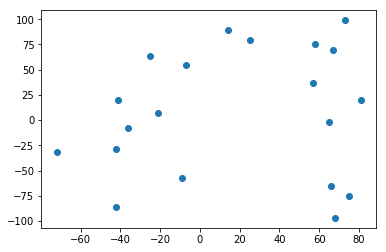

In [473]:
plt.scatter(latitudes, longitudes)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [208]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

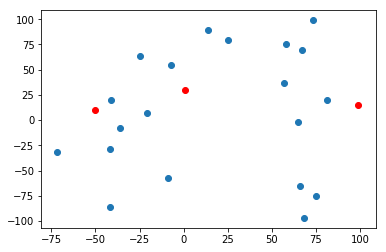

In [474]:
plt.scatter(latitudes, longitudes)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

In [72]:
#try with simple brute force first
import numpy as np
import itertools

In [73]:
n = 15
longitudes = [np.random.randint(-100, 100) for _ in range(n)]
latitudes = [np.random.randint(-100, 100) for _ in range(n)] 
coordinates = list(zip(longitudes, latitudes))

In [74]:
def get_dist(x, y): #input are longitude and latitude,output is matrix
    n=len(x)
    dist=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            dist[i][j]=np.sqrt((x[j]-x[i])**2+(y[j]-y[i])**2)
    return dist

In [75]:
dist_matrix=get_dist(latitudes,longitudes)
print(dist_matrix)

[[  0.         143.40153416 104.80458005 172.58621034 108.4619749
  120.83045974 127.28707711 158.15182579 135.66502866 155.61812234
  201.69531477 141.01418368 144.89996549  60.74537019  28.63564213]
 [143.40153416   0.          42.3792402   82.03657721 102.01960596
  150.05332386  21.02379604 126.64912159  53.48831648 154.78048973
   60.00833275  95.18928511 157.27682601 135.59498516 133.68619974]
 [104.80458005  42.3792402    0.         107.93516572  95.85405573
  140.68404316  23.02172887 134.95184326  69.11584478 155.70806016
  102.31813134 104.00480758 154.15576538  93.39164845 100.17983829]
 [172.58621034  82.03657721 107.93516572   0.          75.80237463
  112.32987136  97.65244493  62.36986452  40.60788101  97.26767192
   81.09870529  43.27817002 106.40488711 191.26944346 150.52574531]
 [108.4619749  102.01960596  95.85405573  75.80237463   0.
   48.0416486  102.77159141  50.59644256  56.08029957  60.80296045
  138.29316686  35.11409973  58.30951895 145.36161804  82.02438662]

In [76]:
def find_path_by_brutal_force(num):   #try brute force first with a small number first so that later we can compare the route with DP
    path_list=list(itertools.permutations(range(1,num)))  #起点为0
    path_sum=[]
    for i in path_list:  #i is a tuple,eg.(1,2,3,4)
        temp_sum=0  #get sum for each i
        x=0         #initialize the start point
        #print(i)
        for j in i:  #j is each indice of each city
            temp_sum +=dist_matrix[x][j]
            #print(dist_matrix[x][j])
            x=j     #set the next start point

        else:     #for循环正常结束，继续在else中语句执行
            temp_sum +=dist_matrix[j][0]
            #print(dist_matrix[j][0])
        path_sum.append([temp_sum,i])
    path_sum.sort(key=lambda x: x[0])
    return path_sum[0]

In [77]:
find_path_by_brutal_force(5)

[413.48474699803904, (2, 1, 3, 4)]

#### brute force is very slow, next try with DP and a visited set to store the already computed result

In [78]:
from time import time
from collections import defaultdict

In [79]:
dp_solution=defaultdict(tuple)
def dp(i,s):   #simple recursion,input is start point and remaining set of cities
    s_int=sum([2**(x-1) for x in s]) #use a int to refer to the content of set of cities
    if len(s)==0:
        return dist_matrix[i][0]
    else:
        min_dist,min_city=min([(dist_matrix[i][j]+dp(j,s-{j}),(j,s-{j})) for j in s if j!=i], key=lambda x: x[0] )
        dp_solution[(i,s_int)]=min_city
        return min_dist

In [81]:
dp(0,set(range(1,5)))   #we get the shorted distance, now we add a decorator 

413.48474699803904

In [82]:
dp_computed={}
def memo_dp(f):
    
    @wraps(f)
    def dp_memo_wrap(arg1,arg2):
        dp_result=None
        
        sum_arg2=sum([2**(i-1) for i in arg2]) #convert set into a int so that it is hashable to be a key for dict
        if (arg1,sum_arg2) in dp_computed:
            dp_result=dp_computed[arg1,sum_arg2]
        else:
            dp_result=f(arg1,arg2)
            dp_computed[arg1,sum_arg2]=dp_result
        return dp_result
    return dp_memo_wrap

In [83]:
dp_solution=defaultdict(tuple)

@memo_dp
def dp2(i,s):   #simple recursion,input is start point and remaining set of cities
    s_int=sum([2**(x-1) for x in s]) #use a int to refer to the content of set of cities
    if len(s)==0:
        return dist_matrix[i][0]
    else:
        min_dist,min_city=min([(dist_matrix[i][j]+dp2(j,s-{j}),(j,s-{j})) for j in s if j!=i], key=lambda x: x[0] )
        dp_solution[(i,s_int)]=min_city
        return min_dist

In [84]:
#need to reset dp_solution before running
#运行速度还是很慢，用时几秒只能试大概15个城市，20个城市要等很久
dp2(0,set(range(1,n)))   #we get the shortest distance, but what is the route?

686.843928565283

In [85]:
def parse_dp_solution(cur_city,cities):  #get the path solution
    route=[]
    j,s=dp_solution[(cur_city,sum([2**(x-1) for x in cities]))]

    route.append(j)
    s_int=sum([2**(x-1) for x in (cities-{j})])
    #print(j,s,s_int,route)
    
    while s:
        j,s = dp_solution[(j,s_int)]
        s_int=sum([2**(x-1) for x in s])
        route.append(j)
        #print(j,s,s_int,route)
    
    chosen_path=[0]+route+[0]
    return chosen_path

In [86]:
parse_dp_solution(0,set(range(1,n)))

[0, 13, 2, 6, 1, 10, 3, 8, 11, 7, 9, 12, 5, 4, 14, 0]

In [87]:
shortest_path=parse_dp_solution(0,set(range(1,n)))

In [88]:
lx=[longitudes[x] for x in shortest_path]
ly=[latitudes[y] for y in shortest_path]

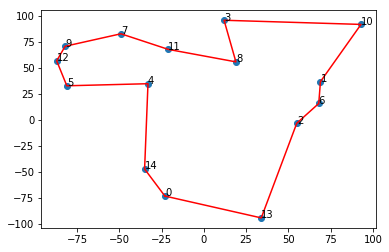

In [89]:
fig, ax = plt.subplots()
ax.scatter(longitudes, latitudes)
for i in range(n):
    ax.annotate(i, (longitudes[i], latitudes[i]))
plt.plot(lx,ly,color='r')

在集合表示那里用set去实现效率很很低，而且要保存的数都是不重复的比较小的整数，所以这里用二进制串表示集合。比如集合{1,3,5,6,7}表示成二进制串用1110101，其中集合里面有的数对应的位数写成1，没有的写成0。要判断第3位是不是1，就把 1110101右移(3-1)位，得到11101，然后结果和00001进行 & 运算，如果结果是1说明第3位是1，否则说明第3位是0。

推广一下，对于数字x，要看它的第i位是不是1，那么可以通过判断布尔表达式 (((x >> (i - 1) ) & 1) == 1的真值来实现。

下一步尝试下用以上方法来提高运行速度

In [502]:
#3 start cities problem not solved yet